In [1]:
import os
import pandas as pd 
import numpy as np 
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer

import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("DNN-EdgeIIoT-dataset.csv", low_memory=False)

In [4]:
# Now I want to see the face of the data
pd.set_option('display.max_columns', None)
df.head()

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,icmp.unused,http.file_data,http.content_length,http.request.uri.query,http.request.method,http.referer,http.request.full_uri,http.request.version,http.response,http.tls_port,tcp.ack,tcp.ack_raw,tcp.checksum,tcp.connection.fin,tcp.connection.rst,tcp.connection.syn,tcp.connection.synack,tcp.dstport,tcp.flags,tcp.flags.ack,tcp.len,tcp.options,tcp.payload,tcp.seq,tcp.srcport,udp.port,udp.stream,udp.time_delta,dns.qry.name,dns.qry.name.len,dns.qry.qu,dns.qry.type,dns.retransmission,dns.retransmit_request,dns.retransmit_request_in,mqtt.conack.flags,mqtt.conflag.cleansess,mqtt.conflags,mqtt.hdrflags,mqtt.len,mqtt.msg_decoded_as,mqtt.msg,mqtt.msgtype,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,2021 11:44:10.081753000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.153346e+09,47892.0,0.0,0.0,0.0,1.0,64855.0,18.0,1.0,0.0,020405b40101040201030307,0,0.0,1883.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1,2021 11:44:10.162218000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.447945e+08,16077.0,0.0,0.0,0.0,0.0,1883.0,24.0,1.0,14.0,0,100c00044d5154540402003c0000,1.0,64855.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1.0,2.0,16.0,12.0,0.0,0,1.0,4.0,MQTT,0,0.0,4.0,0.0,0.0,0.0,0,Normal
2,2021 11:44:10.162271000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,3.153346e+09,62675.0,0.0,0.0,0.0,0.0,64855.0,16.0,1.0,0.0,0,0,1.0,1883.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
3,2021 11:44:10.162641000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,3.153346e+09,54469.0,0.0,0.0,0.0,0.0,64855.0,24.0,1.0,4.0,0,20020000,1.0,1883.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0x00000000,0.0,0.0,32.0,2.0,0.0,0,2.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
4,2021 11:44:10.166132000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.447945e+08,53812.0,0.0,0.0,0.0,0.0,1883.0,24.0,1.0,41.0,0,3027001854656d70657261747572655f616e645f48756d...,15.0,64855.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,48.0,39.0,0.0,32342e36382037362e34320d0a,3.0,0.0,0,Temperature_and_Humidity,24.0,0.0,0.0,0.0,0.0,0,Normal


In [5]:
df.tail()

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,icmp.unused,http.file_data,http.content_length,http.request.uri.query,http.request.method,http.referer,http.request.full_uri,http.request.version,http.response,http.tls_port,tcp.ack,tcp.ack_raw,tcp.checksum,tcp.connection.fin,tcp.connection.rst,tcp.connection.syn,tcp.connection.synack,tcp.dstport,tcp.flags,tcp.flags.ack,tcp.len,tcp.options,tcp.payload,tcp.seq,tcp.srcport,udp.port,udp.stream,udp.time_delta,dns.qry.name,dns.qry.name.len,dns.qry.qu,dns.qry.type,dns.retransmission,dns.retransmit_request,dns.retransmit_request_in,mqtt.conack.flags,mqtt.conflag.cleansess,mqtt.conflags,mqtt.hdrflags,mqtt.len,mqtt.msg_decoded_as,mqtt.msg,mqtt.msgtype,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
2219196,2021 23:24:32.816050000,166.75.162.225,192.168.0.128,0,0.0,0.0,0,31814.0,45620.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
2219197,2021 23:24:32.816595000,70.162.34.183,192.168.0.128,0,0.0,0.0,0,27718.0,45636.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
2219198,2021 23:24:32.818043000,40.13.95.244,192.168.0.128,0,0.0,0.0,0,18502.0,45672.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
2219199,2021 23:24:32.820831000,18.132.75.125,192.168.0.128,0,0.0,0.0,0,1862.0,45737.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
2219200,2021 23:24:32.823654000,82.173.42.163,192.168.0.128,0,0.0,0.0,0,50245.0,45804.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP


In [6]:
df.describe()

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,tcp.ack_raw,tcp.checksum,tcp.connection.fin,tcp.connection.rst,tcp.connection.syn,tcp.connection.synack,tcp.dstport,tcp.flags,tcp.flags.ack,tcp.len,tcp.seq,udp.port,udp.stream,udp.time_delta,dns.qry.name,dns.qry.qu,dns.qry.type,dns.retransmission,dns.retransmit_request,dns.retransmit_request_in,mqtt.conflag.cleansess,mqtt.conflags,mqtt.hdrflags,mqtt.len,mqtt.msg_decoded_as,mqtt.msgtype,mqtt.proto_len,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label
count,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2219201.0,2.219201e+06,2.219201e+06,2219201.0,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2219201.0,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2219201.0,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06
mean,3.323268e-03,1.582732e-02,1.730285e+03,1.893064e+03,2.877556e+03,0.0,4.808231e+00,1.469132e-02,0.0,2.278400e+07,1.573687e+09,2.897927e+04,8.686910e-02,9.222779e-02,7.060199e-02,4.524016e-02,2.626435e+04,1.437637e+01,7.385613e-01,1.214432e+02,8.682862e+06,2.867523e+01,7.198890e+04,3.541572e-01,7.374416e+03,7.247068e-02,0.0,1.179884e-02,2.208002e-05,1.802451e-05,3.741662e-02,7.483324e-02,1.197063e+01,1.982731e+00,0.0,7.481643e-01,1.496665e-01,8.977934e-01,1.496665e-01,1.297764e-03,5.170780e-03,9.417804e-05,2.719709e-01
std,6.843237e-02,3.077555e-01,8.526581e+03,8.870474e+03,4.705188e+05,0.0,9.642259e+01,1.203142e-01,0.0,1.649033e+08,1.337361e+09,2.065386e+04,2.816432e-01,2.893473e-01,2.561589e-01,2.078305e-01,2.750352e+04,8.232028e+00,4.394185e-01,4.996815e+02,3.476928e+07,1.185792e+03,3.654767e+05,1.153177e+01,1.191786e+05,6.182116e+00,0.0,5.641567e-01,4.698887e-03,4.245490e-03,1.897805e-01,3.795610e-01,4.321738e+01,7.648797e+00,0.0,2.701086e+00,7.591219e-01,4.554231e+00,7.591219e-01,1.711483e-01,7.226807e-01,1.377313e-02,4.449751e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,1.000000e+00,4.260962e+07,9.951000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.883000e+03,4.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,6.000000e+00,1.426945e+09,2.843400e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.321000e+03,1.600000e+01,1.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,5.900000e+01,2.506984e+09,4.699400e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000

In [7]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

frame.time                   0
ip.src_host                  0
ip.dst_host                  0
arp.dst.proto_ipv4           0
arp.opcode                   0
arp.hw.size                  0
arp.src.proto_ipv4           0
icmp.checksum                0
icmp.seq_le                  0
icmp.transmit_timestamp      0
icmp.unused                  0
http.file_data               0
http.content_length          0
http.request.uri.query       0
http.request.method          0
http.referer                 0
http.request.full_uri        0
http.request.version         0
http.response                0
http.tls_port                0
tcp.ack                      0
tcp.ack_raw                  0
tcp.checksum                 0
tcp.connection.fin           0
tcp.connection.rst           0
tcp.connection.syn           0
tcp.connection.synack        0
tcp.dstport                  0
tcp.flags                    0
tcp.flags.ack                0
tcp.len                      0
tcp.options                  0
tcp.payl

In [8]:
# 2) Dropping unwanted columns
to_drop = [
    'dns.qry.type', 'frame.time', 'http.file_data', 'http.request.full_uri',
    'http.request.uri.query', 'http.tls_port', 'icmp.unused', 'ip.dst_host',
    'ip.src_host', 'mqtt.msg_decoded_as', 'tcp.options', 'tcp.payload',
    'tcp.srcport'
] #List of unwanted colomns

In [9]:
clean_data = df.drop(columns=to_drop, errors='ignore')

In [11]:
# Now looking into a comparison of before and cleaning the data
print(f"Before cleaning{df.shape} and after cleaning {clean_data.shape}")

Before cleaning(2219201, 63) and after cleaning (2219201, 50)


In [12]:
# Split off features and raw targets (no encoding)
X = clean_data.drop(columns=['Attack_label', 'Attack_type']).copy()
y_label = clean_data['Attack_label']
y_type = clean_data['Attack_type'].astype(str)

In [13]:
# Show all values in the 'Attack_type' column without truncation
pd.set_option('display.max_rows', None)
print(y_type.unique())

['Normal' 'MITM' 'Uploading' 'Ransomware' 'SQL_injection' 'DDoS_HTTP'
 'DDoS_TCP' 'Password' 'Port_Scanning' 'Vulnerability_scanner' 'Backdoor'
 'XSS' 'Fingerprinting' 'DDoS_UDP' 'DDoS_ICMP']


In [14]:
pd.reset_option('display.max_rows')

In [15]:
# Specify attacks and list them by hard coding


attack_types = [
    'Normal',
    'MITM',
    'Uploading',
    'Ransomware',
    'SQL_injection',
    'DDoS_HTTP',
    'DDoS_TCP',
    'Password',
    'Port_Scanning',
    'Vulnerability_scanner',
    'Backdoor',
    'XSS',
    'Fingerprinting',
    'DDoS_UDP',
    'DDoS_ICMP'
]
print("Attack types serial used", attack_types)


Attack types serial used ['Normal', 'MITM', 'Uploading', 'Ransomware', 'SQL_injection', 'DDoS_HTTP', 'DDoS_TCP', 'Password', 'Port_Scanning', 'Vulnerability_scanner', 'Backdoor', 'XSS', 'Fingerprinting', 'DDoS_UDP', 'DDoS_ICMP']


In [16]:
# Check whether I am missing any kind of attack types or not in my y_type
missing = set(y_type.unique()) - set(attack_types)
if missing:
    raise ValueError(f"Found unexpected attack types in data: {missing}")

# **Determining the numerical and categorical values**

In [17]:
print(X.dtypes)

arp.dst.proto_ipv4            object
arp.opcode                   float64
arp.hw.size                  float64
arp.src.proto_ipv4            object
icmp.checksum                float64
icmp.seq_le                  float64
icmp.transmit_timestamp      float64
http.content_length          float64
http.request.method           object
http.referer                  object
http.request.version          object
http.response                float64
tcp.ack                      float64
tcp.ack_raw                  float64
tcp.checksum                 float64
tcp.connection.fin           float64
tcp.connection.rst           float64
tcp.connection.syn           float64
tcp.connection.synack        float64
tcp.dstport                  float64
tcp.flags                    float64
tcp.flags.ack                float64
tcp.len                      float64
tcp.seq                      float64
udp.port                     float64
udp.stream                   float64
udp.time_delta               float64
d

In [18]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
print(X.info())         # Summary: column names, types, non-null counts to see the summary
print(X.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219201 entries, 0 to 2219200
Data columns (total 48 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   arp.dst.proto_ipv4         object 
 1   arp.opcode                 float64
 2   arp.hw.size                float64
 3   arp.src.proto_ipv4         object 
 4   icmp.checksum              float64
 5   icmp.seq_le                float64
 6   icmp.transmit_timestamp    float64
 7   http.content_length        float64
 8   http.request.method        object 
 9   http.referer               object 
 10  http.request.version       object 
 11  http.response              float64
 12  tcp.ack                    float64
 13  tcp.ack_raw                float64
 14  tcp.checksum               float64
 15  tcp.connection.fin         float64
 16  tcp.connection.rst         float64
 17  tcp.connection.syn         float64
 18  tcp.connection.synack      float64
 19  tcp.dstport                float64
 20  tc

In [19]:
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

In [20]:
categorical_cols = X.select_dtypes(include=["object", "category"]).columns
print("Categorical columns:")
print(categorical_cols)

Categorical columns:
Index(['arp.dst.proto_ipv4', 'arp.src.proto_ipv4', 'http.request.method',
       'http.referer', 'http.request.version', 'dns.qry.name.len',
       'mqtt.conack.flags', 'mqtt.msg', 'mqtt.protoname', 'mqtt.topic'],
      dtype='object')


In [21]:
categorical_features = categorical_features = [
    'arp.dst.proto_ipv4', 'arp.src.proto_ipv4', 'http.request.method',
    'http.referer', 'http.request.version', 'dns.qry.name.len',
    'mqtt.conack.flags', 'mqtt.msg', 'mqtt.protoname', 'mqtt.topic'
]

In [22]:
# Hard coding and listing the numerical values
numeric_features =  [
    'arp.opcode', 'arp.hw.size', 'icmp.checksum', 'icmp.seq_le',
    'icmp.transmit_timestamp', 'http.content_length', 'http.response',
    'tcp.ack', 'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin',
    'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack',
    'tcp.dstport', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.seq',
    'udp.port', 'udp.stream', 'udp.time_delta', 'dns.qry.name', 'dns.qry.qu',
    'dns.retransmission', 'dns.retransmit_request',
    'dns.retransmit_request_in', 'mqtt.conflag.cleansess', 'mqtt.conflags',
    'mqtt.hdrflags', 'mqtt.len', 'mqtt.msgtype', 'mqtt.proto_len',
    'mqtt.topic_len', 'mqtt.ver', 'mbtcp.len', 'mbtcp.trans_id',
    'mbtcp.unit_id'
]

# **Building a pipeline to test dataset to not affect the training dataset**

In [23]:
num_pipeline = Pipeline([
    ('robust', RobustScaler()),
    ('minmax', MinMaxScaler()),
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
])

In [25]:
X_proc = preprocessor.fit_transform(X)
feat_names = preprocessor.get_feature_names_out()

X_proc_df = pd.DataFrame(X_proc, index=X.index, columns=feat_names)

In [26]:
print("  Features shape:", X_proc_df.shape)
print("  y_label unique values:", y_label.unique())
print("  y_type unique values: ", attack_types)

  Features shape: (2219201, 249)
  y_label unique values: [0 1]
  y_type unique values:  ['Normal', 'MITM', 'Uploading', 'Ransomware', 'SQL_injection', 'DDoS_HTTP', 'DDoS_TCP', 'Password', 'Port_Scanning', 'Vulnerability_scanner', 'Backdoor', 'XSS', 'Fingerprinting', 'DDoS_UDP', 'DDoS_ICMP']


In [27]:
# Wrapping the categorical values
s_lbl = pd.Series(y_label.values, name='Attack_label')
s_typ = pd.Series(y_type.values,  name='Attack_type')

In [28]:
# Encoding the categorical values
y_type_cat = pd.Categorical(s_typ, categories=attack_types, ordered=True)
s_typ_enc = pd.Series(y_type_cat.codes, index=s_typ.index,name='Attack_type_enc')

In [29]:
# Checking the sanity for attack types for both binary and multiclass classification
assert not (s_typ_enc < 0).any(
), "Some attack_type values were not in your list!"

In [30]:
# Stratifying the two attack class
y_strat = s_lbl.astype(str) + "__" + s_typ_enc.astype(str)

In [31]:
# Spliting 20% of the data for test
X_trval, X_test, \
    y_lbl_trval, y_lbl_test, \
    y_typ_trval, y_typ_test, \
    y_strat_trval, y_strat_test = train_test_split(
        X_proc_df, s_lbl, s_typ_enc, y_strat,
        test_size=0.20,
        stratify=y_strat,
        random_state=42
    )

In [32]:
# Split train vs validation (so 70/10/20 overall)
X_train, X_val, \
    y_lbl_train, y_lbl_val, \
    y_typ_train, y_typ_val, \
    y_strat_train, y_strat_val = train_test_split(
        X_trval, y_lbl_trval, y_typ_trval, y_strat_trval,
        test_size=0.20,   # .125 of .8 = .10 total
        stratify=y_strat_trval,
        random_state=42
    )

In [33]:
# Checking the shapes of the X_train, X_test, X_val
print("Shapes:")
print("  Train:", X_train.shape, y_lbl_train.shape, y_typ_train.shape)
print("  Val:  ", X_val.shape,   y_lbl_val.shape,   y_typ_val.shape)
print("  Test: ", X_test.shape,  y_lbl_test.shape,  y_typ_test.shape)

Shapes:
  Train: (1420288, 249) (1420288,) (1420288,)
  Val:   (355072, 249) (355072,) (355072,)
  Test:  (443841, 249) (443841,) (443841,)


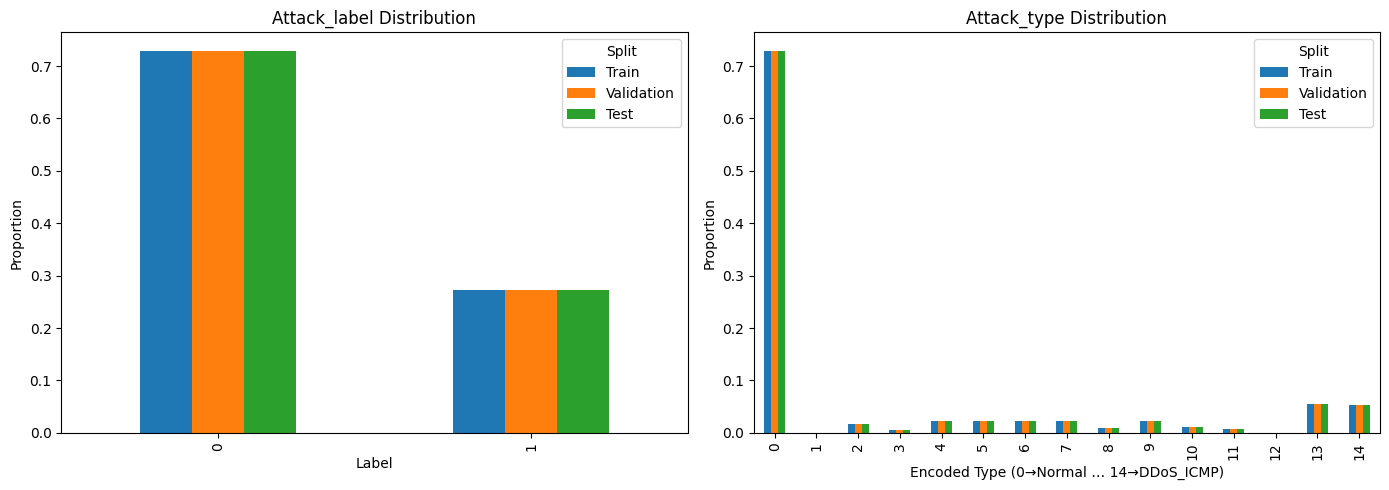

In [34]:
# visualize the for Binary and Multiclass classification
dist_bin = pd.DataFrame({
    'Train':      y_lbl_train.value_counts(normalize=True),
    'Validation': y_lbl_val.value_counts(normalize=True),
    'Test':       y_lbl_test.value_counts(normalize=True)
}).sort_index()

#    multi-class type
dist_type = pd.DataFrame({
    'Train':      y_typ_train.value_counts(normalize=True).sort_index(),
    'Validation': y_typ_val.value_counts(normalize=True).sort_index(),
    'Test':       y_typ_test.value_counts(normalize=True).sort_index()
}).fillna(0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

dist_bin.plot(kind='bar', ax=ax1)
ax1.set_title('Attack_label Distribution')
ax1.set_xlabel('Label')
ax1.set_ylabel('Proportion')
ax1.legend(title='Split')

dist_type.plot(kind='bar', ax=ax2)
ax2.set_title('Attack_type Distribution')
ax2.set_xlabel('Encoded Type (0→Normal … 14→DDoS_ICMP)')
ax2.set_ylabel('Proportion')
ax2.legend(title='Split')

plt.tight_layout()
plt.show()

Save train/val/test splits to CSV

In [35]:
import os

# make sure the output folder exists
os.makedirs('Edge-IIoTset', exist_ok=True)

# pack your splits into a dic
splits = {
    'train': (X_train, y_lbl_train, y_typ_train),
    'val':   (X_val,   y_lbl_val,   y_typ_val),
    'test':  (X_test,  y_lbl_test,  y_typ_test),
}

for split_name, (X_split, lbls, typs) in splits.items():
    # start from your preprocessed features
    df_split = X_split.copy()

    # attach the two targets
    df_split['Attack_label'] = lbls.values
    df_split['Attack_type'] = typs.values

    # write out (will overwrite if already exists)
    out_path = f'Edge-IIoTset/{split_name}.csv'
    df_split.to_csv(out_path, index=False)
    print(f"✅ Saved {split_name} split to {out_path} | "
          f"rows={len(df_split)}")

✅ Saved train split to Edge-IIoTset/train.csv | rows=1420288
✅ Saved val split to Edge-IIoTset/val.csv | rows=355072
✅ Saved test split to Edge-IIoTset/test.csv | rows=443841
